In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def proc_table (x,interval):
    convergence_threshold = 10
    x['interval'] = np.ceil((x['episode'])/interval)
    x['successful'] = (x['timesteps']>=convergence_threshold)+0
    x['valid_action'] = x['timesteps'] - 1
    x_pre = x.groupby(['interval'], as_index=False).agg({'reward':np.mean,
                                                             'valid_action':np.sum,
                                                             'successful':np.sum})
    x_pre['successful_cum'] = x_pre['successful'].cumsum()
    return x_pre

def proc_stat (cwd,interval_stat):
    df = pd.DataFrame()
    for root, dirs, files in os.walk(cwd):
        print(root+','+str(len(files)))
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                df_t = pd.read_table(os.path.join(root,file), sep=',')
                df = df.append(proc_table(df_t,interval_stat))
    return df.groupby(['interval'], as_index=False).mean()

def preprocess ():
    interval=5000
    cwd = os.getcwd() + str("/Scene_1")
    dqn_s1 = proc_stat(cwd+str("/DQN"),interval)
    ba_s1 = proc_stat(cwd+str("/BaDQN"),interval)
    bo_s1 = proc_stat(cwd+str("/BoDQN"),interval)   
    b2_s1 = proc_stat(cwd+str("/B2DQN"),interval)    
    
    cwd = os.getcwd() + str("/Scene_2")
    dqn_s2 = proc_stat(cwd+str("/DQN"),interval)
    ba_s2 = proc_stat(cwd+str("/BaDQN"),interval)
    bo_s2 = proc_stat(cwd+str("/BoDQN"),interval)
    b2_s2 = proc_stat(cwd+str("/B2DQN"),interval)
    return dqn_s1,ba_s1,b2_s1,bo_s1,dqn_s2,ba_s2,b2_s2,bo_s2

def plots(scenario,index,y_label,ncol):    
    interval=5000
    fig, ax = plt.subplots(1, 1)    
    if scenario == 1:
        ax.plot(dqn_s1['interval'], dqn_s1[index], marker='p', markerfacecolor='white',markersize=5,label='DQN')
        ax.plot(ba_s1['interval'], ba_s1[index], marker='^', markerfacecolor='white',markersize=5,label='BaDQN')
        ax.plot(bo_s1['interval'], bo_s1[index], marker='D', markerfacecolor='white',markersize=5,label='BoDQN')
        ax.plot(b2_s1['interval'], b2_s1[index], marker='s', markerfacecolor='white',markersize=5,label='B2DQN')

    elif scenario == 2:
        ax.plot(dqn_s2['interval'], dqn_s2[index], marker='p', markerfacecolor='white',markersize=5,label='DQN')
        ax.plot(ba_s2['interval'], ba_s2[index], marker='^', markerfacecolor='white',markersize=5,label='BaDQN')
        ax.plot(bo_s2['interval'], bo_s2[index], marker='D', markerfacecolor='white',markersize=5,label='BoDQN')
        ax.plot(b2_s2['interval'], b2_s2[index], marker='s', markerfacecolor='white',markersize=5,label='B2DQN')

    ax.legend(prop={'size': 8}, loc='upper left', ncol=ncol, numpoints = 1)
    ax.set_ylabel(y_label, fontsize=12)
    ax.grid(True)
    ax.grid(color='b', ls='--', lw=0.1)    
    x_up = 100000/interval
    x_0 = 0
    x_1 = x_up*0.2
    x_2 = x_up*0.4
    x_3 = x_up*0.6
    x_4 = x_up*0.8
    plt.xticks([x_0, x_1, x_2, x_3, x_4, x_up], [r'$0$', r'$20000$', r'$40000$', r'$60000$', r'$80000$', r'$100000$'])

    plt.show()

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (6.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300

dqn_s1,ba_s1,b2_s1,bo_s1,dqn_s2,ba_s2,b2_s2,bo_s2  = preprocess()

/home/bom/workspace/B2DQN_GITHUB/Results/Scene_1/DQN,15
/home/bom/workspace/B2DQN_GITHUB/Results/Scene_1/BaDQN,15
/home/bom/workspace/B2DQN_GITHUB/Results/Scene_1/BoDQN,15
/home/bom/workspace/B2DQN_GITHUB/Results/Scene_1/B2DQN,15
/home/bom/workspace/B2DQN_GITHUB/Results/Scene_2/DQN,15
/home/bom/workspace/B2DQN_GITHUB/Results/Scene_2/BaDQN,15
/home/bom/workspace/B2DQN_GITHUB/Results/Scene_2/BoDQN,15
/home/bom/workspace/B2DQN_GITHUB/Results/Scene_2/B2DQN,15


## Figure 3 (a)

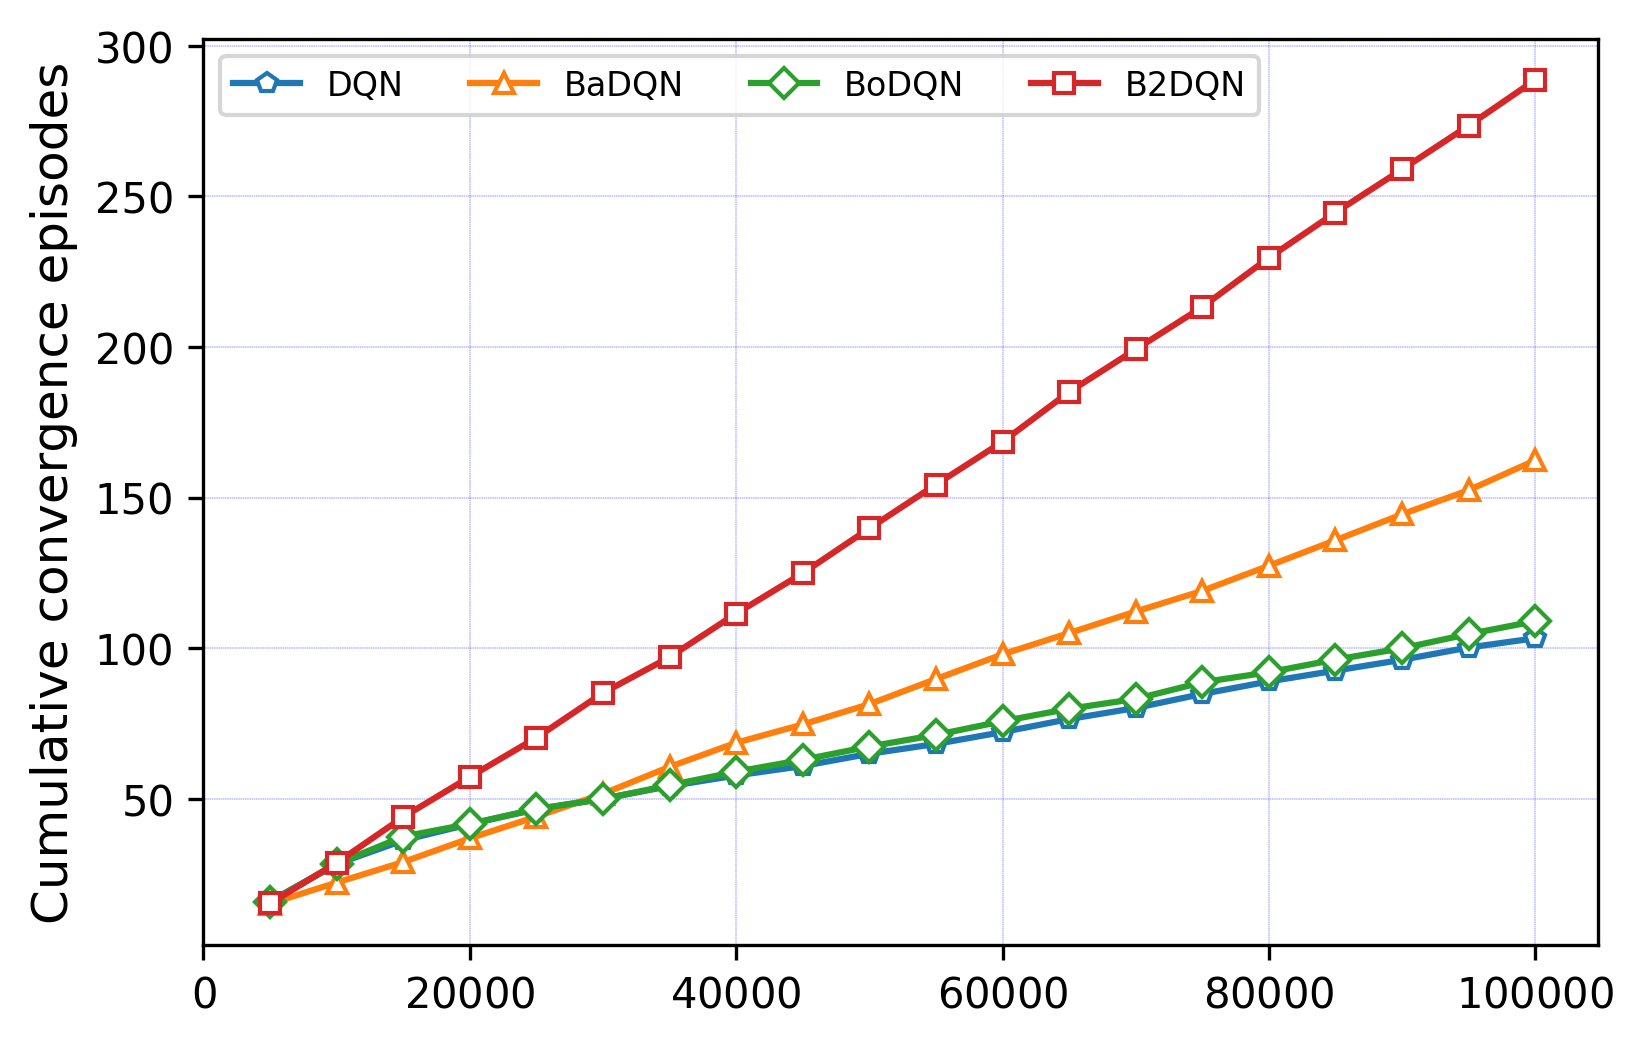

In [4]:
plots(1,'successful_cum',y_label='Cumulative convergence episodes',ncol=5)

## Figure 3 (b)

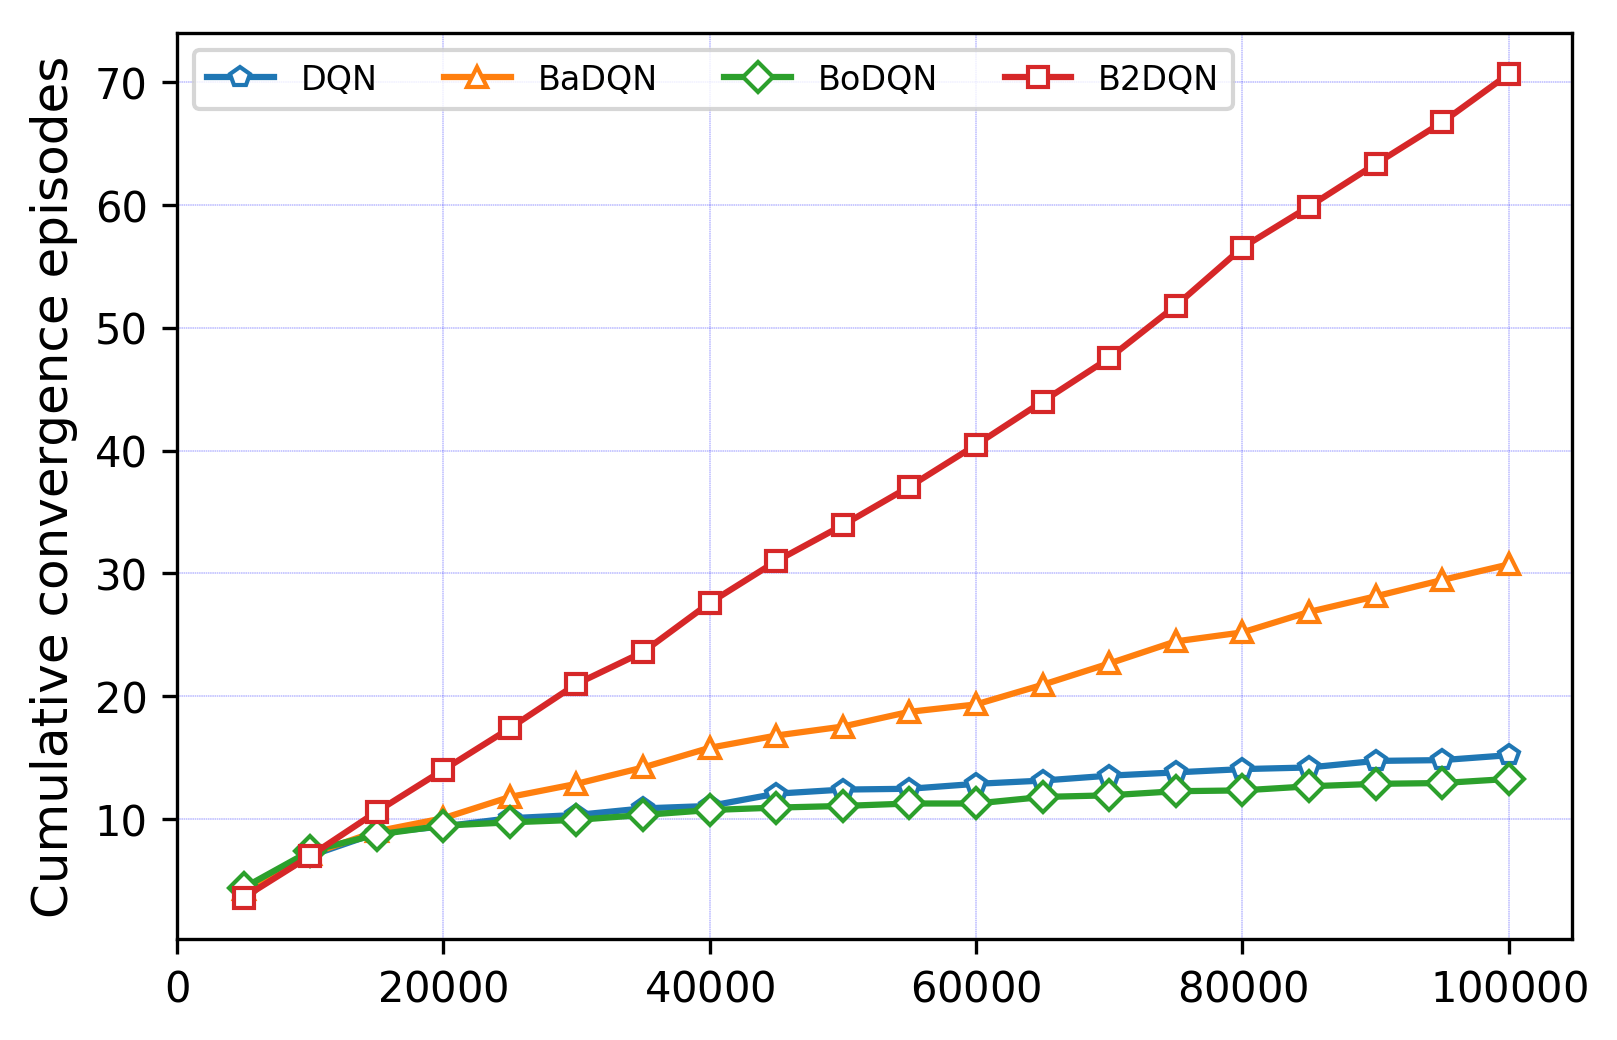

In [5]:
plots(2,'successful_cum',y_label='Cumulative convergence episodes',ncol=5)

## Figure 4 (a)

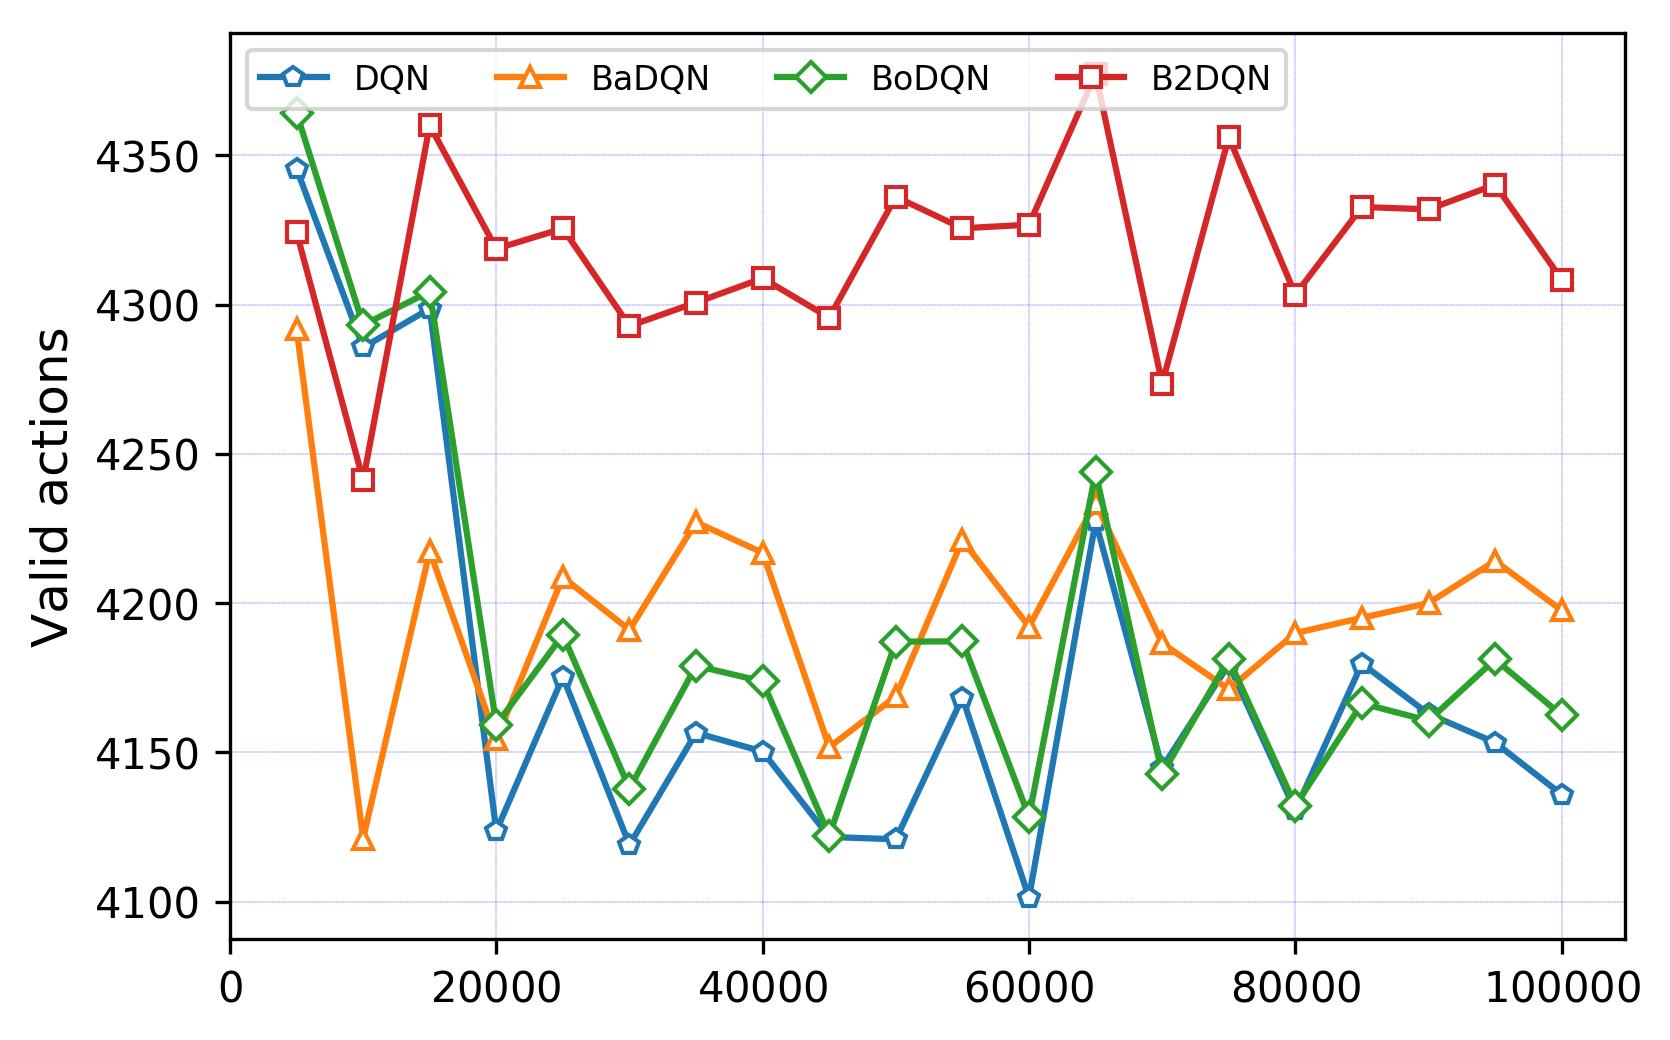

In [6]:
plots(1,'valid_action',y_label='Valid actions',ncol=5)

## Figure 5 (b)

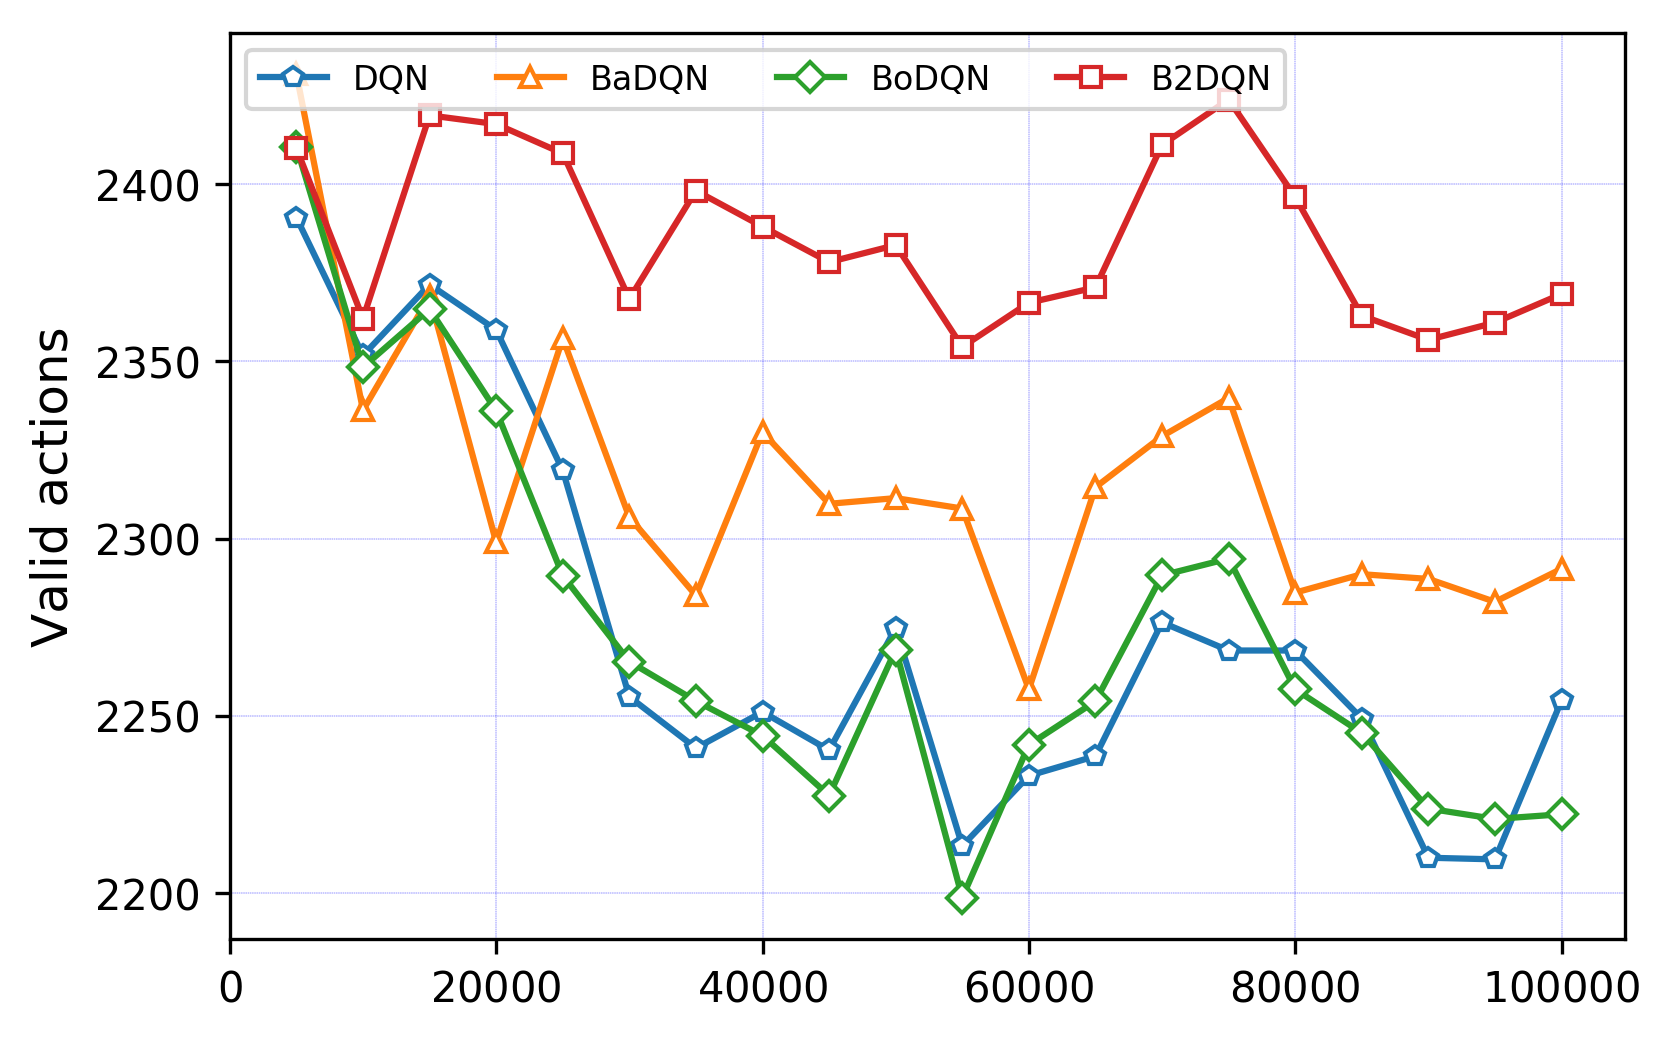

In [7]:
plots(2,'valid_action',y_label='Valid actions',ncol=5)

## TABLE IV

In [8]:
index_1 = 'valid_action'
index_2 = 'successful'

Algorithms = ['DQN','BoDQN','B2DQN','BaDQN']

Scence_no = "Scene_1"
T_S1 = pd.DataFrame()
T_S1['Algorithm'] = Algorithms
T_S1['Scene'] = Scence_no
T_S1[index_1]=[dqn_s1[index_1].mean(),bo_s1[index_1].mean(),b2_s1[index_1].mean(),ba_s1[index_1].mean()]
T_S1[index_2]=[dqn_s1[index_2].mean(),bo_s1[index_2].mean(),b2_s1[index_2].mean(),ba_s1[index_2].mean()]

Scence_no = "Scene_2"
T_S2= pd.DataFrame()
T_S2['Algorithm'] = Algorithms
T_S2['Scene'] = Scence_no
T_S2[index_1]=[dqn_s2[index_1].mean(),bo_s2[index_1].mean(),b2_s2[index_1].mean(),ba_s2[index_1].mean()]
T_S2[index_2]=[dqn_s2[index_2].mean(),bo_s2[index_2].mean(),b2_s2[index_2].mean(),ba_s2[index_2].mean()]

T = pd.concat([T_S1,T_S2]) 
T.pivot_table(values=[index_1, index_2], index=['Algorithm'], columns=['Scene'])

successful           valid_action             
Scene        Scene_1   Scene_2      Scene_1      Scene_2
Algorithm                                               
B2DQN      14.430000  3.533333  4318.936667  2385.166667
BaDQN       8.120000  1.536667  4197.506667  2315.896667
BoDQN       5.450000  0.663333  4189.803333  2272.853333
DQN         5.166667  0.760000  4174.030000  2273.760000

## Complexity

In [9]:
def proc_stat_c (cwd):
    df = pd.DataFrame()
    for root, dirs, files in os.walk(cwd):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                df_t = pd.read_table(os.path.join(root,file), sep=',')                
                df = df.append(df_t.groupby(['episode'], as_index=False).agg({'duration':np.mean}))
    return df.mean()

cwd = os.getcwd() + str("/Scene_Complexity")
dqn_c = proc_stat_c(cwd+str("/DQN"))
ba_c = proc_stat_c(cwd+str("/BaDQN"))
bo_c = proc_stat_c(cwd+str("/BoDQN"))
b2_c = proc_stat_c(cwd+str("/B2DQN"))

print('dqn_c:'+str(dqn_c['duration']))
print('ba_c:'+str(ba_c['duration']))
print('bo_c:'+str(bo_c['duration']))
print('b2_c:'+str(b2_c['duration']))


dqn_c:24.547936999997447
ba_c:39.03573083333266
bo_c:59.87446233332998
b2_c:76.59180766666645
